In [5]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

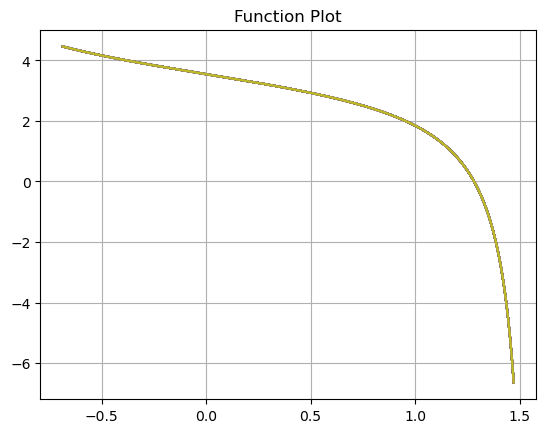

In [6]:
def f(x,a):
    disc = pi*a - x
    val = np.sqrt(disc) - np.tan(x)
    # val[np.abs(val) >= 10] = np.nan
    return val
def disc(x,a):
    disc = pi*a - x
    return disc

for i in range(1,50):
    x = np.linspace(-pi/4+0.1,pi/2-0.1,1000)
    y = f(x,4)
    plt.plot(x,y)

plt.title("Function Plot")
plt.grid()

C:\Users\Asus\AppData\Local\Temp\ipykernel_4240\3560802190.py:3: RuntimeWarning: invalid value encountered in sqrt
  rhs = np.sqrt(disc(x,a))


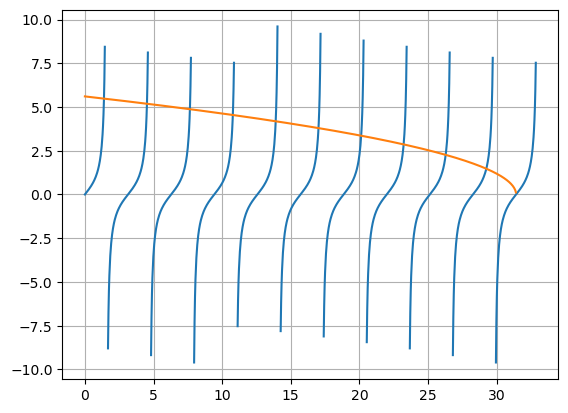

In [7]:
a = 10
x = np.linspace(0,10*pi+pi/2,1000)
rhs = np.sqrt(disc(x,a))
lhs = np.tan(x)
lhs[np.abs(lhs) >= 10] = np.nan

plt.plot(x,lhs,label = "lhs")
plt.plot(x,rhs,label = "rhs")

plt.grid()

C:\Users\Asus\AppData\Local\Temp\ipykernel_4240\2977745701.py:11: RuntimeWarning: invalid value encountered in sqrt
  rhs = np.sqrt(disc(x,a))


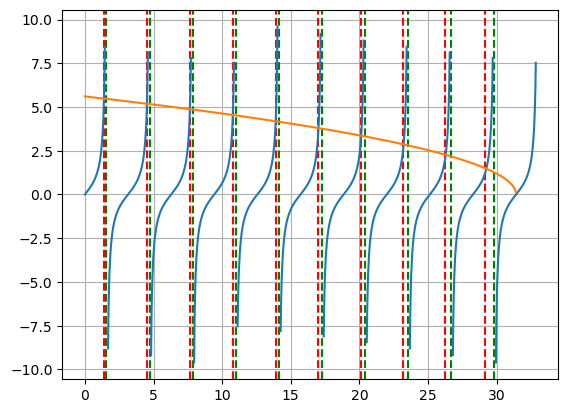

In [8]:
def brackketing(a):
    bound = []
    for n in range(0,10):
        x1 = (2*n+1)*np.pi/2
        y2 = np.sqrt(disc(x1,a))
        x2 = np.arctan(y2) + np.pi*n-0.01
        bound.append((x1,x2))
    return bound
a = 10
x = np.linspace(0,10*pi+pi/2,1000)
rhs = np.sqrt(disc(x,a))
lhs = np.tan(x)
lhs[np.abs(lhs) >= 10] = np.nan
bound = brackketing(10)
for i in bound:
    plt.axvline(x=i[0],linestyle='--',color = "g")
    plt.axvline(x=i[1],linestyle='--',color="r" )

plt.plot(x,lhs,label = "lhs")
plt.plot(x,rhs,label = "rhs")

plt.grid()
        

In [9]:
def bracketting(f,a,x1,x2,step=None):
    if not step:
        step = (x1-x2)
    bracketing_lines = []
    end = []
    final_bracket = []
    def brac(x1,x2):
        if np.sign(f(x1,a)*f(x2,a))<=0:
            final_bracket.append((x1,x2))
            return
        
        if x1-step/2 > 0:
            m1 = x1-step/2
        else:
            m1 = x1
        m2 = x2+step/2
        bracketing_lines.append((m1,m2))
        brac(m1,m2)
    brac(x1,x2)
    #print(final_bracket)
    last_brac = bracketing_lines[-2]
    for i in range(2):
        if np.sign(f(final_bracket[0][i],a)*f(last_brac[i],a))<=0:
            end.append((final_bracket[0][i],last_brac[i]))

    return end,bracketing_lines
    
    
bracketting(f,10,x1=0.1,x2 = 0.5,step = 0.1)

([(1.4000000000000008, 1.3500000000000008)],
 [(0.05, 0.55),
  (0.05, 0.6000000000000001),
  (0.05, 0.6500000000000001),
  (0.05, 0.7000000000000002),
  (0.05, 0.7500000000000002),
  (0.05, 0.8000000000000003),
  (0.05, 0.8500000000000003),
  (0.05, 0.9000000000000004),
  (0.05, 0.9500000000000004),
  (0.05, 1.0000000000000004),
  (0.05, 1.0500000000000005),
  (0.05, 1.1000000000000005),
  (0.05, 1.1500000000000006),
  (0.05, 1.2000000000000006),
  (0.05, 1.2500000000000007),
  (0.05, 1.3000000000000007),
  (0.05, 1.3500000000000008),
  (0.05, 1.4000000000000008)])

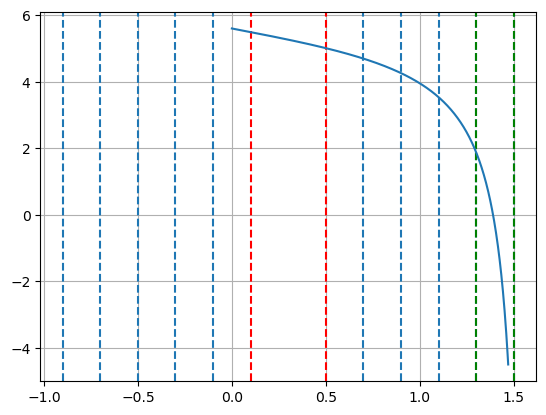

In [10]:
def bound_box(f,a,x1,x2,step =None):   
    final_bound,boxes = bracketting(f,a,x1,x2,step = step)
    x = np.linspace(0,pi/2-0.1,1000)
    y = f(x,a)
    plt.axvline(x=x1,color="r",linestyle='--')
    plt.axvline(x=x2,color ="r", linestyle='--')
    for i in boxes[2:]:
        plt.axvline(x=i[0],linestyle='--')
        plt.axvline(x=i[1],linestyle='--')
    plt.axvline(x=final_bound[0][1], color='g', linestyle='--')
    plt.axvline(x=final_bound[0][0], color='g', linestyle='--')
    plt.plot(x,y)
    plt.grid()
bound_box(f,10,0.1,0.5)


no of recursions 53


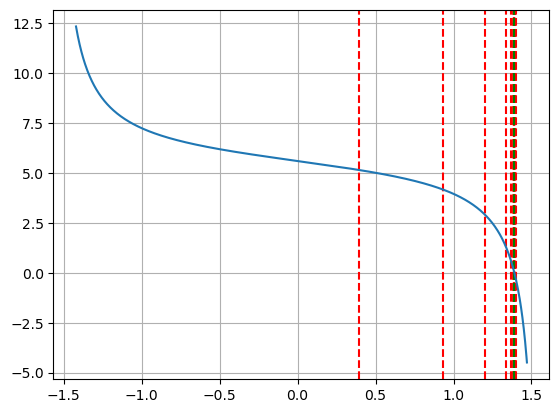

In [31]:
def bisection(f,a,x1,x2,acc):
    if np.sign(f(x1,a)*f(x2,a)) == 1:
        print("No Zeroes in the interval")
    boundaries = []
    final_bound = []
    i = []
    def binary_brac(x1,x2):
        i.append(1)
        x3 =  (x1+x2)/2
        boundaries.append(x3)
        if np.abs(x1-x2)< acc:
            final_bound.append((x1,x2))  
            return      
        if np.sign(f(x3,a)*f(x1,a)) < 0:
            binary_brac(x1,x3)
        if np.sign(f(x3,a)*f(x2,a)) < 0:
            binary_brac(x2,x3)
    binary_brac(x1,x2)
    return final_bound,boundaries,len(i)
def bound_box(f,a):   
    final_bound,boxes,l = bisection(f,a,-pi/4+0.1,pi/2-0.1,1e-15)
    print("no of recursions",l)
    x = np.linspace(-pi/2+0.15,pi/2-0.1,1000)
    y = f(x,a)
    for i in boxes:
        plt.axvline(x=i, color='r', linestyle='--')
    plt.axvline(x=final_bound[0][1], color='g', linestyle='--')
    plt.axvline(x=final_bound[0][0], color='g', linestyle='--')
    plt.plot(x,y)
    plt.grid()
bound_box(f,10)

In [12]:
def secant(f,a,x1,x2,acc = 1e-15):
    if np.sign(f(x1,a)*f(x2,a)) > 0:
        print("No Zeroes in the interval")
    i = []
    boundaries = []
    final_bound = []
    def binary_sec(x1,x2):
        i.append(1)
        x3 =  (x2*f(x1,a) - x1*f(x2,a))/(f(x1,a)-f(x2,a))
        boundaries.append(x3)
        if np.abs(x1-x2)< acc:
            final_bound.append((x1,x2))  
            return
        binary_sec(x2,x3)      
        # if np.sign(f(x3,a)*f(x1,a)) < 0:
        #     binary_brac(x1,x3)
        # if np.sign(f(x3,a)*f(x2,a)) < 0:
        #     binary_brac(x2,x3)
    binary_sec(x1,x2)
    return final_bound,boundaries,len(i)

[(1.3902865684447556, 1.3902865684447552)]
number_of_recursion 11


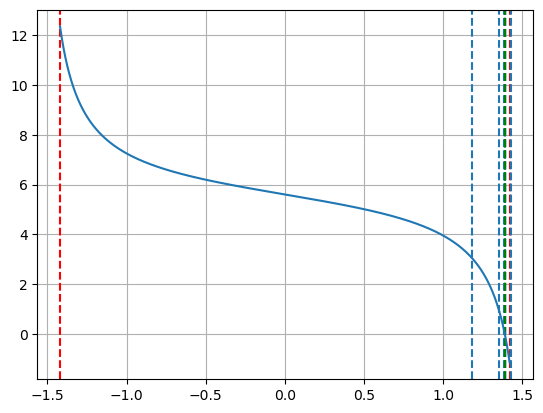

In [29]:
def bound_box(f,a,x1,x2):   
    final_bound,boxes,no_of_recursion = secant(f,a,x1,x2,1e-15)
    print(final_bound)
    print("number_of_recursion",no_of_recursion)
    x = np.linspace(x1,x2,1000)
    y = f(x,a)
    plt.axvline(x=x1,color="r",linestyle='--')
    plt.axvline(x=x2,color ="r", linestyle='--')
    for i in boxes:
        plt.axvline(x=i, linestyle='--')
    plt.axvline(x=final_bound[0][1], color='g', linestyle='--')
    plt.axvline(x=final_bound[0][0], color='g', linestyle='--')
    plt.plot(x,y)
    plt.grid()
bound_box(f,10,-pi/2+0.15,pi/2-0.15)

In [10]:
# import numpy as np

# def false_position(f, a, x1, x2, acc=0.01):
#     # Check if a root exists in the interval
#     if f(x1, a) * f(x2, a) > 0:
#         print("No Zeroes in the interval")
#         return None, None, 0

#     iterations = 0
#     boundaries = []

#     while np.abs(x1 - x2) > acc:
#         iterations += 1
#         x3 = (x2 * f(x1, a) - x1 * f(x2, a)) / (f(x1, a) - f(x2, a))
#         boundaries.append(x3)

#         # Update interval based on sign of f(x3)
#         if f(x3, a) * f(x1, a) < 0:
#             x2 = x3
#         else:
#             x1 = x3

#     return (x1, x2), boundaries, iterations


In [11]:
# def false_position(f,a,x1,x2,acc = 0.01):
#     if np.sign(f(x1,a)*f(x2,a)) >1:
#         print("No Zeroes in the interval")
#     i = []
#     boundaries = []
#     final_bound = []
#     def binary_false(x1,x2):
#         i.append(1)
#         print(len(i))
#         x3 =  (x2*f(x1,a) - x1*f(x2,a))/(f(x1,a)-f(x2,a))
#         boundaries.append(x3)
#         if np.abs(x1-x2)< acc:
#             final_bound.append((x1,x2))  
#             return     
#         if np.sign(f(x3,a)*f(x1,a)) < 0:
#             binary_false(x1,x3)
#         else:
#             binary_false(x3,x2)
#     binary_false(x1,x2)
#     return final_bound,boundaries,len(i)

In [16]:
def iqc_root(f,a,b,c):
    r = f(b)/f(c)
    s = f(b)/f(a)
    t = f(a)/f(c)
    p = s*(t*(r-t)*(c-b)-(1-r)*(b-a))
    q = (t-1)*(r-1)*(s-1)
    x = b + p/(q + 1e-5)
    return x

def brent(j,alp,x1,x2,acc):
    f = lambda x: j(x,alp)
    estimates = []

    a = x1
    b = x2
    c = a
    d = c
    iteration = 0
    while np.abs(b-a) > acc:
        iteration +=1
        if iteration >1000:
            break
        if np.abs(f(b))>np.abs(f(a)):
            a,b  = b,a
        s = iqc_root(f,a,b,c)
        if s < (3*a+b)/4 or s>b or np.abs(s - b) >= np.abs(b - c) / 2:
            s = (a+b)/2
        d,c = c,b
        if f(a)*f(s)<0:
            b = s
        else:
            a = s
        if np.abs(f(b))>np.abs(f(a)):
            a,b  = b,a
        estimates.append(b)
    return b,estimates,iteration

        
    


1.3902865684447552
number_of_recursion 63


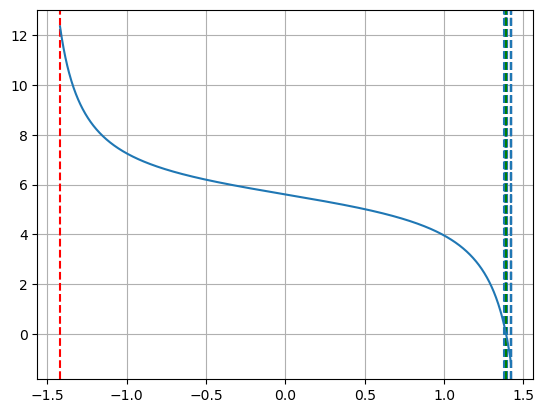

In [30]:
def bound_box(f,a,x1,x2):   
    final_bound,boxes,no_of_recursion = brent(f,a,x1,x2,1e-15)
    print(final_bound)
    print("number_of_recursion",no_of_recursion)
    x = np.linspace(x1,x2,1000)
    y = f(x,a)
    plt.axvline(x=x1,color="r",linestyle='--')
    plt.axvline(x=x2,color ="r", linestyle='--')
    for i in boxes:
        plt.axvline(x=i, linestyle='--')
    plt.axvline(x=final_bound, color='g', linestyle='--')
    plt.plot(x,y)
    plt.grid()
bound_box(f,10,-pi/2+0.15,pi/2-0.15)


In [33]:
def newton_raphson(j,alp,x0,acc):
    f  = lambda x: j(x,alp)
    df  = lambda x: (f(x+1e-10)-f(x-1e-10))/(2e-10)
    estimates = []
    iteration = 0
    x = x0
    while abs(f(x)) > acc or iteration<1e3:
        if np.abs(df(x)) < 1e-10:
            print(f"Derivative near zero at iteration {iteration}, x = {x},df={df(x)}")
            break
        iteration += 1 
        estimates.append(x)
        x = x - f(x)/df(x)

    return x,estimates,iteration



0.9741377177056061
number_of_recursion 1000


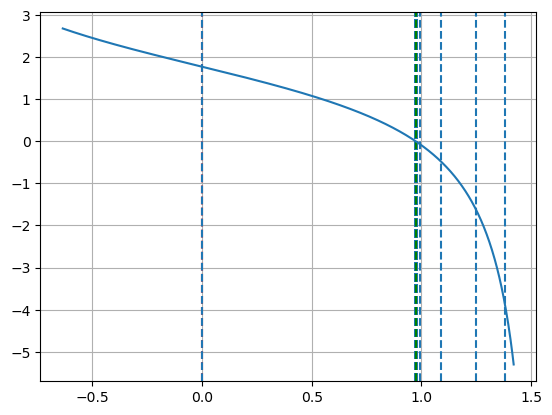

In [36]:
def bound_box(f,a,x1,x2,x0):   
    final_bound,boxes,no_of_recursion =newton_raphson(f,a,x0,0.1)
    print(final_bound)
    print("number_of_recursion",no_of_recursion)
    x = np.linspace(x1,x2,1000)
    y = f(x,a)
    # plt.axvline(x=x1,color="r",linestyle='--')
    plt.axvline(x=x0,color ="r", linestyle='--')
    for i in boxes:
        plt.axvline(x=i, linestyle='--')
    plt.axvline(x=final_bound, color='g', linestyle='--')
    plt.plot(x,y)
    plt.grid()
bound_box(f,1,-pi/4+0.15,pi/2-0.15,1e-15)

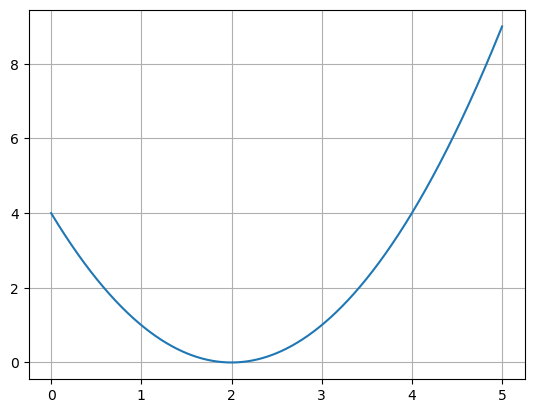

In [ ]:
def f3(x,e):
    val = (x-2+e)*(x-2-e)*(x-2)
    return val

x = np.linspace(0,5,1000)
y = f3(x,1e-3)

plt.plot(x,y)
plt.grid()


In [64]:
def poly_bracket(e,acc=1e-15):
    f = lambda x: f3(x,e)*(x-2)

    x1 = 2+acc
    x2 = 3
    while f(x1)*f(x2)>0:
        x2 = (x1+x2)/2
    while np.abs(x2-x1)>acc:
        x3 = (x1+x2)/2
        if f(x1)*f(x2) <0:
            if f(x1)*f(x3) <0:
                x2 =x3
            else:
                x1 = x3

    root = (x1+x2)/2
    root_1 =2-(root-2)

    print(root,root_1)

poly_bracket(1e-3)

2.001 1.999


[-9.42477796 -6.28318531 -3.14159265  0.          3.14159265  6.28318531
  9.42477796]


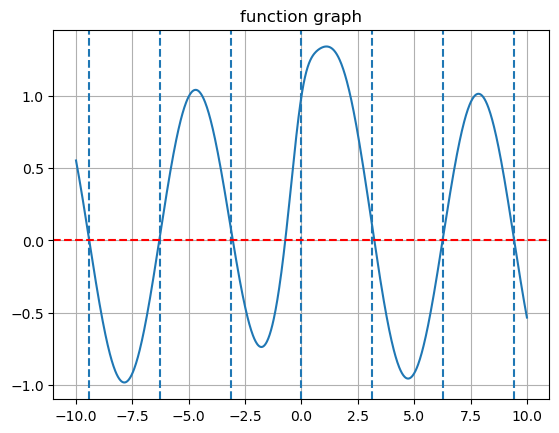

In [32]:
def func(x):
    val  = np.sin(x) + 1/(1+x**2)
    return val

x = np.linspace(-10,10,1000)
y = func(x)
zeros_of_sin = np.array(range(-3,4))*np.pi
for i in zeros_of_sin:
    plt.axvline(x=i, linestyle='--') 
plt.plot(x,y)
plt.axhline(y=0, linestyle='--',color = "r")

plt.title("function graph")
plt.grid()

(-7.857972477860882, 77)


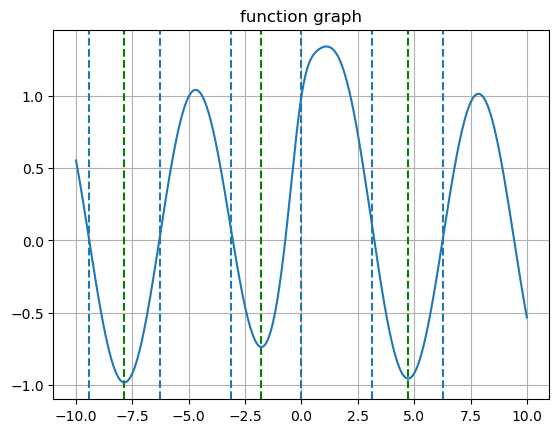

In [48]:
def golden_section(f,a,b,tol):
    phi = (3-np.sqrt(5))/5
    x1 = a + (b-a)*phi
    x2 = b - (b-a)*phi
    iteration = 0
    mid = (a + b) / 2
    if not (f(a) > f(mid) < f(b)):
        return None, False  


    while abs(b-a)>tol:
        iteration +=1
        if f(x1)>f(x2):
            a = x1
        else:
            b = x2
        x1 = a + (b-a)*phi
        x2 = b - (b-a)*phi
    
    return (a+b)/2,iteration

x = np.linspace(-10,10,1000)
y = func(x)
zeros_of_sin = np.array(range(-3,4))*np.pi

print(golden_section(func,zeros_of_sin[0],zeros_of_sin[1],tol=1e-5))

for i in range(len(zeros_of_sin)-1):
    minimum,_ = golden_section(func,zeros_of_sin[i],zeros_of_sin[i+1],tol=1e-5)
    plt.axvline(x=zeros_of_sin[i], linestyle='--',label = "Brackets")
    if minimum :
        plt.axvline(x=minimum, linestyle='--',color = "g",label = "minimums") 

plt.plot(x,y)

plt.title("function graph")
#plt.legend()
plt.grid()

        
        
        


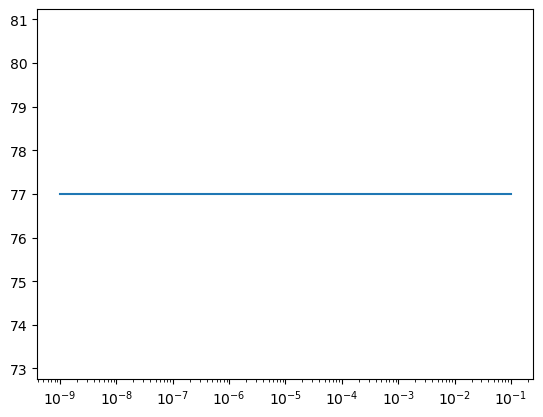

In [54]:
x = np.linspace(-10,10,1000)
y = func(x)
zeros_of_sin = np.array(range(1,3))*np.pi
tol_level = np.logspace(-1,-9,100)
iter_list = []
for i in tol_level:
    min,iteration = golden_section(func,zeros_of_sin[0],zeros_of_sin[1],tol=1e-5)
    iter_list.append(iteration)
plt.semilogx(tol_level,iter_list)

In [107]:
def brent_method(f, a, b, tol=1e-5):
    phi = (3 - 5 ** 0.5) / 2
    x = w = v = a + phi * (b - a)
    d = e = b - a
    iteration = 0
    while abs(b - a) > tol:
        iteration +=1
        g, e = e, d
        u = None
        mid = (a + b) / 2
        if not (f(a) > f(mid) < f(b)):
            return None, False  

        if x != w and x != v and w != v:
            numerator = (x - w)**2 * (f(x) - f(v)) - (x - v)**2 * (f(x) - f(w))
            denominator = 2 * ((x - w) * (f(x) - f(v)) - (x - v) * (f(x) - f(w)))
            if denominator != 0:
                u = x - numerator / denominator
                if not (a <= u <= b) or abs(u - x) < tol:
                    u = None

        if u is None:
            if x < (a + b) / 2:
                u = x + phi * (b - x)
            else:
                u = x - phi * (x - a)

        d = abs(u - x)
        if f(u) < f(x):
            if u < x:
                b = x
            else:
                a = x
            v, w, x = w, x, u
        else:
            if u < x:
                a = u
            else:
                b = u
            if f(u) <= f(w) or w == x:
                v, w = w, u
            elif f(u) <= f(v) or v == x or v == w:
                v = u

    return x,iteration


(None, False)


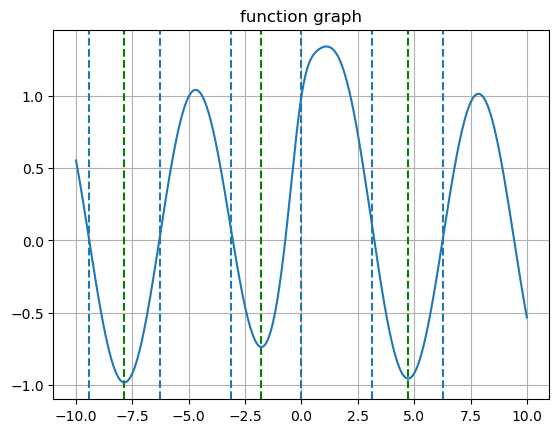

In [99]:
x = np.linspace(-10,10,1000)
y = func(x)
zeros_of_sin = np.array(range(-3,4))*np.pi

print(brent_method(func,zeros_of_sin[0],zeros_of_sin[1],tol=1e-5))

for i in range(len(zeros_of_sin)-1):
    minimum,_ = golden_section(func,zeros_of_sin[i],zeros_of_sin[i+1],tol=1e-5)
    plt.axvline(x=zeros_of_sin[i], linestyle='--',label = "Brackets")
    if minimum :
        plt.axvline(x=minimum, linestyle='--',color = "g",label = "minimums") 

plt.plot(x,y)

plt.title("function graph")
#plt.legend()
plt.grid()

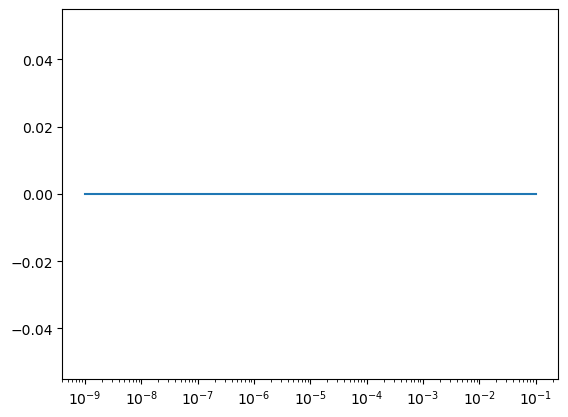

In [100]:
x = np.linspace(-10,10,1000)
y = func(x)
zeros_of_sin = np.array(range(1,3))*np.pi
tol_level = np.logspace(-1,-9,100)
iter_list = []
for i in tol_level:
    min,iteration = brent_method(func,zeros_of_sin[0],zeros_of_sin[1],tol=1e-5)
    iter_list.append(iteration)
plt.semilogx(tol_level,iter_list)

Mininum and width of dead zone -14.13786690161847 8.92226468418391e-08
Mininum and width of dead zone -7.857972477860882 8.876097733875175e-08
Mininum and width of dead zone -1.777696526269816 9.420097549428433e-08
Mininum and width of dead zone 4.729708818341301 8.753843251117277e-08
Mininum and width of dead zone 10.997052802900676 8.907903020739254e-08


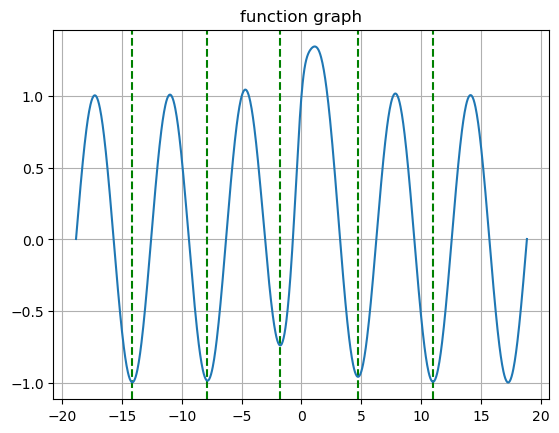

In [101]:
x = np.linspace(-6*pi,6*pi,1000)
y = func(x)
zeros_of_sin = np.array(range(-5,5))*np.pi

e = 1e-15
def second_der(x):
    val = -np.sin(x) + -2*1/(1+x**2)**2 + 8*x/(1+x**2)**3
    return val
def delta(b,e):
    val = np.sqrt(e)*np.abs(b)*np.sqrt(2*np.abs(func(b))/(b**2*second_der(b)))
    return val

for i in range(len(zeros_of_sin)-1):

    minimum,_ = golden_section(func,zeros_of_sin[i],zeros_of_sin[i+1],tol=1e-5)
    if minimum :
        det = delta(minimum,e)
        dead_a,dead_b = minimum-det,minimum+det
        print("Mininum and width of dead zone",minimum,2*det)
        plt.axvline(x=minimum, linestyle='--',color = "g",label = "minimums") 
        # plt.axvline(x=dead_a, linestyle='--')
        # plt.axvline(x=dead_a, linestyle='--')

plt.plot(x,y)

plt.title("function graph")
#plt.legend()
plt.grid()

In [105]:
def func_der(x):
    val = np.cos(x) - 2*x/(1+x**2)**2
    return val
def iqc_root(f,a,b,c):
    r = f(b)/f(c)
    s = f(b)/f(a)
    t = f(a)/f(c)
    p = s*(t*(r-t)*(c-b)-(1-r)*(b-a))
    q = (t-1)*(r-1)*(s-1)
    x = b + p/(q + 1e-5)
    return x

def brent(f,x1,x2,acc):
    estimates = []


    a = x1
    b = x2
    c = a
    d = c
    iteration = 0
    while np.abs(b-a) > acc:
        iteration +=1
        if iteration >1000:
            break
        if np.abs(f(b))>np.abs(f(a)):
            a,b  = b,a
        s = iqc_root(f,a,b,c)
        if s < (3*a+b)/4 or s>b or np.abs(s - b) >= np.abs(b - c) / 2:
            s = (a+b)/2
        d,c = c,b
        if f(a)*f(s)<0:
            b = s
        else:
            a = s
        if np.abs(f(b))>np.abs(f(a)):
            a,b  = b,a
        estimates.append(b)

    return b,estimates,iteration

Error in minimization over root {-14.13786690161847} finding on derivative {1.11669256241953e-06}
Error in minimization over root {-7.857972477860882} finding on derivative {9.699291503295626e-08}
Error in minimization over root {-1.777696526269816} finding on derivative {1.4514036090762517e-06}
Error in minimization over root {4.729708818341301} finding on derivative {3.359144081116483e-06}
Error in minimization over root {10.997052802900676} finding on derivative {1.5364394094774525e-06}


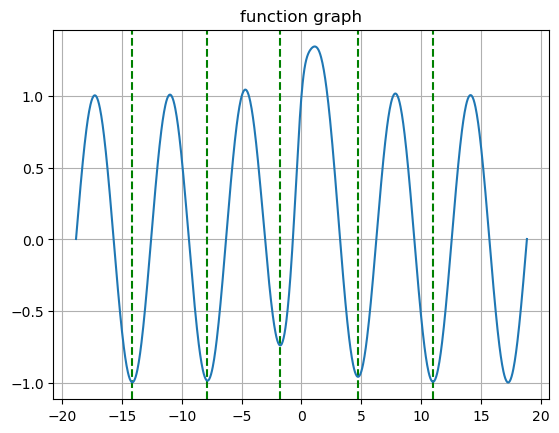

In [114]:
x = np.linspace(-6*pi,6*pi,1000)
y = func(x)
zeros_of_sin = np.array(range(-5,5))*np.pi

for i in range(len(zeros_of_sin)-1):

    minimum,_ = golden_section(func,zeros_of_sin[i],zeros_of_sin[i+1],tol=1e-5)
 

    if minimum :
        der_minimum,_,_ = brent(func_der,zeros_of_sin[i],zeros_of_sin[i+1],1e-5)
        #error_1 = np.abs(minimum - zeros_of_sin[i]+np.pi/2)
        error_2 = np.abs(der_minimum - minimum)
        #print("Error in minimization using brent method:",{error_1})
        print("Error in minimization over root" ,{float(minimum)}, "finding on derivative",{error_2})
    
        plt.axvline(x=minimum, linestyle='--',color = "g",label = "minimums") 
        # plt.axvline(x=dead_a, linestyle='--')
        # plt.axvline(x=dead_a, linestyle='--')

plt.plot(x,y)

plt.title("function graph")
#plt.legend()
plt.grid()

In [3]:
import numpy as np

In [5]:
(np.exp(-1)-np.exp(-2))

0.23254415793482963